In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

In [52]:
!ls ..

data  model  pipeline  requirements.txt


In [53]:
df = pd.read_csv('../data/final/final_df.csv', index_col=0)

In [54]:
df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,ALL_NBA_TEAM_NUMBER,NAME
7,51,1998,0,1610612758,SAC,29.0,31,0.0,530.0,103,...,31.0,37.0,58,16.0,1.0,19.0,31,227,0,Mahmoud Abdul-Rauf
8,51,2001,0,1610612763,VAN,32.0,41,0.0,485.0,120,...,20.0,25.0,76,9.0,1.0,26.0,50,266,0,Mahmoud Abdul-Rauf
0,1505,1998,0,1610612758,SAC,23.0,59,16.0,959.0,144,...,72.0,116.0,51,35.0,13.0,65.0,81,376,0,Tariq Abdul-Wahad
1,1505,1999,0,1610612758,SAC,24.0,49,49.0,1205.0,177,...,114.0,186.0,50,50.0,16.0,70.0,121,454,0,Tariq Abdul-Wahad
2,1505,2000,0,1610612753,ORL,25.0,46,46.0,1205.0,223,...,162.0,239.0,72,53.0,16.0,87.0,116,563,0,Tariq Abdul-Wahad


In [55]:
df.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'ALL_NBA_TEAM_NUMBER', 'NAME'],
      dtype='object')

In [56]:
df.dtypes

PLAYER_ID                int64
SEASON_ID                int64
LEAGUE_ID                int64
TEAM_ID                  int64
TEAM_ABBREVIATION       object
PLAYER_AGE             float64
GP                       int64
GS                     float64
MIN                    float64
FGM                      int64
FGA                      int64
FG_PCT                 float64
FG3M                   float64
FG3A                   float64
FG3_PCT                float64
FTM                      int64
FTA                      int64
FT_PCT                 float64
OREB                   float64
DREB                   float64
REB                    float64
AST                      int64
STL                    float64
BLK                    float64
TOV                    float64
PF                       int64
PTS                      int64
ALL_NBA_TEAM_NUMBER      int64
NAME                    object
dtype: object

In [57]:
df = df.drop(['FG_PCT', 'FG3_PCT', 'FT_PCT', 'REB', 'PTS'], axis=1)

In [58]:
df['ALL_NBA_FLAG'] = df['ALL_NBA_TEAM_NUMBER'].apply(lambda x: 1 if x else 0)

In [59]:
df_kobe = df[df['NAME'] == 'Kobe Bryant']

In [60]:
X = df.drop(['PLAYER_ID',
             'SEASON_ID',
             'LEAGUE_ID',
             'TEAM_ID',
             'TEAM_ABBREVIATION', 
             'ALL_NBA_TEAM_NUMBER',
             'ALL_NBA_FLAG',
             'NAME'], axis=1)

y = df['ALL_NBA_FLAG']

In [61]:
print(X.shape)
print(y.shape)

(12397, 17)
(12397,)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69420)

In [63]:
y_train.shape

(8305,)

In [64]:
y_test.shape

(4092,)

In [65]:
y_train.sum()

212

In [66]:
y_test.sum()

120

In [48]:
clf = LogisticRegressionCV(cv=10,
                           scoring='roc_auc',
                           solver='lbfgs',
                           max_iter=100000,
                           n_jobs=-1)
clf.fit(X_train, y_train)

LogisticRegressionCV(cv=10, max_iter=100000, n_jobs=-1, scoring='roc_auc')

In [76]:
y_train_predict = clf.predict_proba(X_train)[:, 1]
y_test_predict = clf.predict_proba(X_test)[:, 1]

In [80]:
print(roc_auc_score(y_train, y_train_predict))

0.9915539634764727


In [78]:
print(roc_auc_score(y_test, y_test_predict))

0.9932527693856998


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


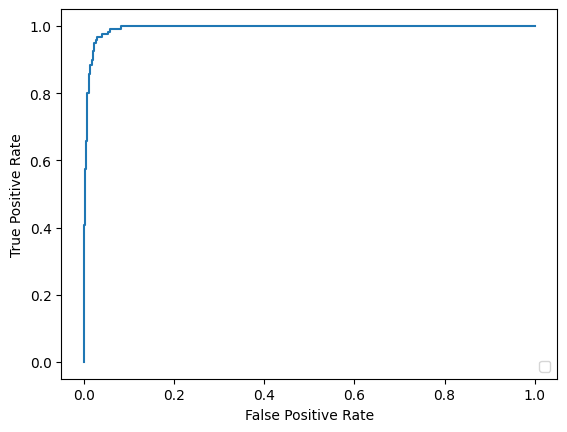

In [84]:
fpr, tpr, _ = roc_curve(y_test, y_test_predict)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()